# Глубинное обучение, ИИ ВШЭ

## Домашнее задание 1. Полносвязные нейронные сети. 

### Общая информация

### Оценивание и штрафы

Максимально допустимая оценка за работу без бонусов — 10 баллов. Сдавать задание после указанного срока жесткого дедлайна нельзя.

Сдача работы после мягкого дедлайна штрафуется ступенчато, -1 балл в сутки. Один раз за модуль студентам предоставляется возможность использовать отсрочку и сдать в жесткий дедлайн без штрафа.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке. Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

Использование генеративных моделей допустимо на следующих условиях:
- Количество кода, написанное генеративными моделями, не превышает 30%
- Указана модель, использованная для генерации, а также промпт
- В конце работы необходимо описать свой опыт использования генеративного ИИ для решения данного домашнего задания. Укажите как часто Вам приходилось исправлять код своими руками или просить модель что-то исправить. Было ли это быстрее, чем написать код самим? 

В случае невыполнения этих требований работа не оценивается и оценка за неё не превышает 0 баллов.

### О задании

В этом задании вам предстоит обучить полносвязную нейронную сеть для предсказания года выпуска песни по ее аудио-признакам. Для этого мы будем использовать [Million Songs Dataset](https://samyzaf.com/ML/song_year/song_year.html).

In [405]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from IPython.display import clear_output
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from tqdm.notebook import tqdm

plt.rcParams.update({"font.size": 16})
sns.set_style("whitegrid")
np.random.seed(0xFA1AFE1)

Начнем с того, что скачаем и загрузим данные:

In [406]:
# !wget -O data.txt.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip

In [407]:
df = pd.read_csv("data.txt.zip", header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


Посмотрим на статистики по данным.

In [408]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,1998.397082,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,10.931046,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,2002.000000,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,2006.000000,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


Целевая переменная, год выпуска песни, записана в первом столбце. Посмотрим на ее распределение.

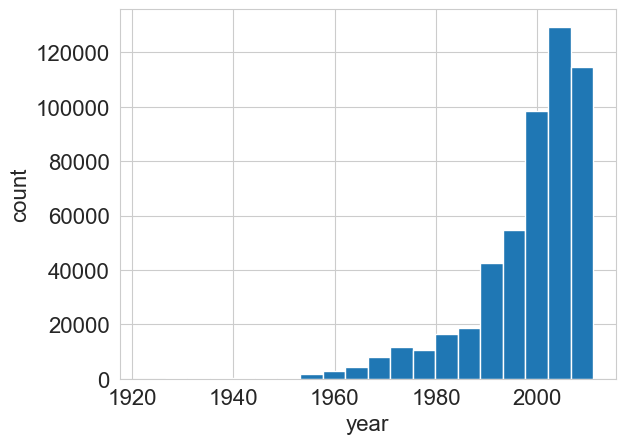

Range: 1922 - 2011
Unique values: 89


In [409]:
plt.hist(df.iloc[:, 0], bins=20)
plt.xlabel("year")
plt.ylabel("count")
plt.show()
print(f"Range: {df.iloc[:, 0].min()} - {df.iloc[:, 0].max()}")
print(f"Unique values: {np.unique(df.iloc[:, 0]).size}")

Разобьем данные на обучение и тест (не меняйте здесь ничего, чтобы сплит был одинаковым у всех).

In [544]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = int(0.75 * X.shape[0])
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]
X_train.shape, X_test.shape

((386508, 90), (128837, 90))

**Задание 0 (0 баллов, но при невыполнении максимальная оценка за всю работу &mdash; 0 баллов).** Мы будем использовать MSE как метрику качества. Прежде чем обучать нейронные сети, нам нужно проверить несколько простых бейзлайнов, чтобы было с чем сравнить более сложные алгоритмы. Для этого бучите `Ridge` регрессию из `sklearn`. Кроме того, посчитайте качество при наилучшем константном прогнозе (также пропишите текстом, какая константа будет лучшей для MSE).

In [411]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

In [412]:
ridge = Ridge(alpha=1)

ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"mse: {mse}")

mse: 89.74966397222074


в контексте года, это большая ошибка

In [413]:
# подбор константного прогноза для минимального MSE
mse_best = 10000000

for const in range(1922, 2012):
    mse_for_const = mean_squared_error(y_test, np.full(shape=len(y_test), fill_value=const))
    if mse_for_const < mse_best:
        const_best = const
        mse_best = mse_for_const

In [414]:
print(f'лучший год для контсантного прогноза = {const_best} \n' 
      f'mse = {round(mse_best, 2)}')

лучший год для контсантного прогноза = 1998 
mse = 117.83


**Ответ:** лучшая константа для прогноза - 1998 год (mse = 117.8)

Теперь приступим к экспериментам с нейросетями. Для начала отделим от данных валидацию:

In [545]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=0xE2E4
)
X_train.shape, X_val.shape

((289881, 90), (96627, 90))

## Глава I. Заводим нейронную сеть (5 баллов)

**Задание 1.1 (0.5 баллов).** Заполните пропуски в функции `train_and_validate`. Она поможет нам запускать эксперименты. Можете также реализовать поддержку обучения на GPU, чтобы эксперименты считались быстрее. Бесплатно воспользоваться GPU можно на сервисах **Google Colab** и **Kaggle**.

In [416]:
def plot_losses(train_losses, train_metrics, val_losses, val_metrics):
    """
    Plot losses and metrics while training
      - train_losses: sequence of train losses
      - train_metrics: sequence of train MSE values
      - val_losses: sequence of validation losses
      - val_metrics: sequence of validation MSE values
    """
    clear_output()
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(range(1, len(train_losses) + 1), train_losses, label="train")
    axs[0].plot(range(1, len(val_losses) + 1), val_losses, label="val")
    axs[1].plot(range(1, len(train_metrics) + 1), train_metrics, label="train")
    axs[1].plot(range(1, len(val_metrics) + 1), val_metrics, label="val")

    if max(train_losses) / min(train_losses) > 10:
        axs[0].set_yscale("log")

    if max(train_metrics) / min(train_metrics) > 10:
        axs[0].set_yscale("log")

    for ax in axs:
        ax.set_xlabel("epoch")
        ax.legend()

    axs[0].set_ylabel("loss")
    axs[1].set_ylabel("MSE")
    plt.show()


def train_and_validate(
    model,
    optimizer,
    criterion,
    metric,
    train_loader,
    val_loader,
    num_epochs,
    verbose=True,
):
    """
    Train and validate neural network
      - model: neural network to train
      - optimizer: optimizer chained to a model
      - criterion: loss function class
      - metric: function to measure MSE taking neural networks predictions
                 and ground truth labels
      - train_loader: DataLoader with train set
      - val_loader: DataLoader with validation set
      - num_epochs: number of epochs to train
      - verbose: whether to plot metrics during training
    Returns:
      - train_mse: training MSE over the last epoch
      - val_mse: validation MSE after the last epoch
    """
    train_losses, val_losses = [], [] # значения loss
    train_metrics, val_metrics = [], [] # значения метрик

    for epoch in range(1, num_epochs + 1):
        model.train() 
        running_loss, running_metric = 0, 0
        pbar = (
            tqdm(train_loader, desc=f"Training {epoch}/{num_epochs}") # визуализация процесса обучения
            if verbose
            else train_loader
        )

        for i, (X_batch, y_batch) in enumerate(pbar, 1):
            """
            YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
            Do forward and backward passes
            predictions = ...
            loss = ...
            """
            # forward pass (предсказание и loss для батча)
            predictions = model(X_batch)
            loss = criterion(predictions, y_batch)

            # backward pass
            optimizer.zero_grad() # обнуление градиентов
            loss.backward() # новые градиенты
            optimizer.step() # новые веса по новому градиенту

            with torch.no_grad():
                metric_value = metric(predictions, y_batch)
                if type(metric_value) == torch.Tensor:
                    metric_value = metric_value.item()
                running_loss += loss.item() * X_batch.shape[0]
                running_metric += metric_value * X_batch.shape[0]

            if verbose and i % 100 == 0:
                pbar.set_postfix({"loss": loss.item(), "MSE": metric_value})

        train_losses += [running_loss / len(train_loader.dataset)]
        train_metrics += [running_metric / len(train_loader.dataset)]

        # перевод в режим валидации
        model.eval()
        running_loss, running_metric = 0, 0
        pbar = (
            tqdm(val_loader, desc=f"Validating {epoch}/{num_epochs}")
            if verbose
            else val_loader
        )

        for i, (X_batch, y_batch) in enumerate(pbar, 1):
            with torch.no_grad():
                """
                YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
                Do evaluation
                predictions = ...
                loss = ...
                """
                # forward pass (только он так как валидация)
                predictions = model(X_batch)
                loss = criterion(predictions, y_batch)

                metric_value = metric(predictions, y_batch)
                if type(metric_value) == torch.Tensor:
                    metric_value = metric_value.item()
                running_loss += loss.item() * X_batch.shape[0]
                running_metric += metric_value * X_batch.shape[0]

            if verbose and i % 100 == 0:
                pbar.set_postfix({"loss": loss.item(), "MSE": metric_value})

        val_losses += [running_loss / len(val_loader.dataset)]
        val_metrics += [running_metric / len(val_loader.dataset)]

        if verbose:
            plot_losses(train_losses, train_metrics, val_losses, val_metrics)

    if verbose:
        print(f"Validation MSE: {val_metrics[-1]:.3f}")

    return train_metrics[-1], val_metrics[-1]

**Задание 1.2 (0.75 балла).** Попробуем обучить нашу первую нейронную сеть. Здесь целевая переменная дискретная &mdash; это год выпуска песни. Поэтому будем учить сеть на классификацию c помощью [кросс-энтропийной функции потерь](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html).

- В качестве архитектуры сети возьмите два линейных слоя с активацией ReLU между ними c числом скрытых нейронов, равным 128.
- Используйте SGD с `lr=1e-2`.
- Возьмите размер мини-батча около 32-64, примерно 3-4 эпох обучения должно быть достаточно.
- Скорее всего вам пригодится `torch.utils.data.TensorDataset`. Когда будете конвертировать numpy-массивы в torch-тензоры, используйте тип `torch.float32`.
- Также преобразуйте целевую переменную так, чтобы ее значения принимали значения от $0$ до $C-1$, где $C$ &mdash; число классов (лучше передайте преобразованное значение в TensorDataset, исходное нам еще пригодится)
- В качестве параметра `metric` в `train_and_validate` передайте lambda-выражение, которое считает MSE по выходу нейронной сети и целевой переменной. В случае классификации предсказывается класс с наибольшей вероятностью (или, что то же самое, с наибольшим значением **логита**$^1$).

$^1$ **Логит** &mdash; выход последнего линейного слоя, может принимать любые вещественные значения. Если применить Softmax к логитам, то получатся вероятности распределения классов.

Настройка девайса

In [417]:
device = torch.device("mps")

Кол-во классов

In [418]:
df.iloc[:, 0].nunique()

89

Подготовка датасета

In [419]:
from sklearn.preprocessing import LabelEncoder

In [420]:
label_encoder = LabelEncoder()

In [421]:
# преобразование таргета в метки
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

In [422]:
# Тензоры
X_train_tensor = torch.FloatTensor(X_train).to(device)
y_train_tensor = torch.LongTensor(y_train_encoded).to(device)
X_val_tensor = torch.FloatTensor(X_val).to(device)
y_val_tensor = torch.LongTensor(y_val_encoded).to(device)

In [423]:
# Датасет и Dataloader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

In [424]:

for name, param in model.named_parameters():
    print(name, param.shape)

fc1.weight torch.Size([128, 90])
fc1.bias torch.Size([128])
fc2.weight torch.Size([89, 128])
fc2.bias torch.Size([89])


Подготовка к обучению

In [425]:
input_size = 90
hidden_size = 128
learning_rate = 1e-2
num_epochs = 4
num_classes = 89

In [426]:
# Fully connected neural network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out=self.fc1(x)
        out=self.relu(out)
        out=self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

In [427]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

Реализация обучения

In [428]:
def accuracy_metric(y_pred, y_test):
    _, predicted = torch.max(y_pred, 1)
    return (predicted == y_test).float().mean().item()

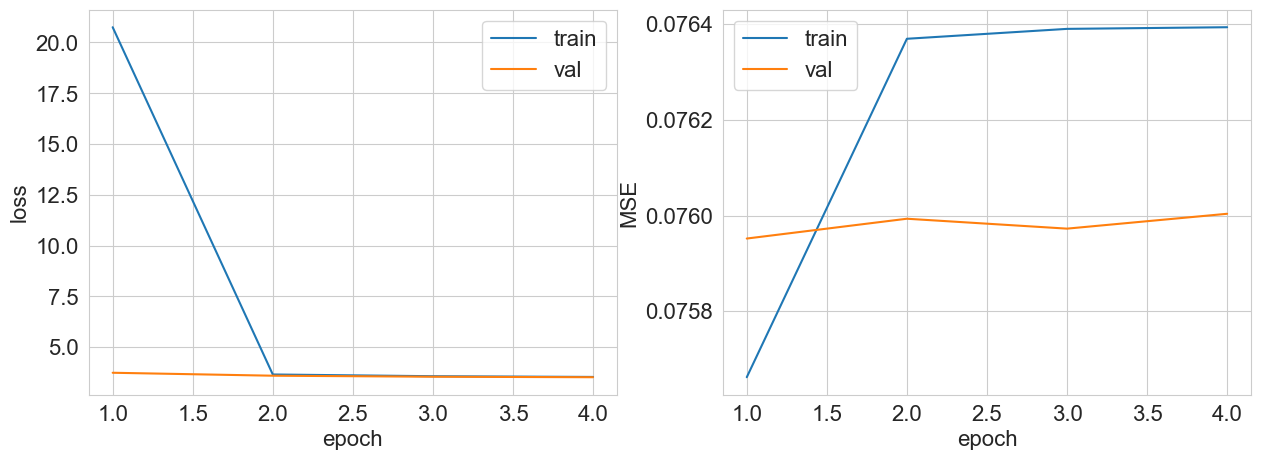

Validation MSE: 0.076


(0.07639341660865301, 0.07600360147858032)

In [429]:
train_and_validate(model,
    optimizer,
    criterion,
    accuracy_metric,
    train_loader,
    val_loader,
    num_epochs)

**Задание 1.3 (0.5 балла).** Прокомментируйте ваши наблюдения. Удалось ли побить бейзлайн? Как вы думаете, хорошая ли идея учить классификатор для этой задачи? Почему?

**Ответ:** Качество получилось очень низким (7.6% предсказано верно). Сравнивать с baseline тяжело, так как там регрессия, но mse = 117 звучит гораздо лучше. \
Думаю, классификатор для этой задачи не лучшее решение, так как классов очень много и таргет порядкой, поэтому лучше попробовать улучшить показатели регрессии

**Задание 1.4 (0.75 балла).** Теперь попробуем решать задачу как регрессию. Обучите нейронную сеть на [MSE](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html).

- Используйте такие же гиперпараметры обучения.
- Когда передаете целевую переменную в TensorDataset, сделайте reshape в (-1, 1).
- Не забудьте изменить lambda-выражение, которые вы передаете в `train_and_validate`.
- Если что-то пойдет не так, можете попробовать меньшие значения `lr`.

Данные

In [430]:
# Тензоры без LabelEncoder
X_train_tensor = torch.FloatTensor(X_train).to(device)
y_train_tensor = torch.LongTensor(y_train).to(device)
X_val_tensor = torch.FloatTensor(X_val).to(device)
y_val_tensor = torch.LongTensor(y_val).to(device)

In [431]:
# Датасет и Dataloader c reshape
train_dataset_reg = TensorDataset(X_train_tensor.float(), y_train_tensor.float().reshape(-1, 1))
val_dataset_reg = TensorDataset(X_val_tensor.float(), y_val_tensor.float().reshape(-1, 1))

batch_size = 64
train_loader_reg = DataLoader(train_dataset_reg, batch_size=batch_size, shuffle=True)
val_loader_reg = DataLoader(val_dataset_reg, batch_size=batch_size)

Параметры

In [432]:
input_size = 90
hidden_size = 128
learning_rate_mse = 1e-6
num_epochs = 5

Архитектура сети

In [433]:
# сеть с одним выходом, так как регрессия
class NeuralNet_reg(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out
    
model_reg = NeuralNet_reg(input_size, hidden_size).to(device)
criterion_mse = torch.nn.MSELoss()

optimizer_reg = torch.optim.SGD(model_reg.parameters(), lr=learning_rate_mse)

Метрика

In [434]:
def mse_metric(y_pred, y_test):
    return torch.mean((y_pred - y_test) ** 2).float().item()

In [435]:
next(iter(train_loader_reg))

[tensor([[ 4.3594e+01,  4.2375e+01,  1.0267e+01,  ...,  9.9217e+00,
           1.2115e+02,  8.0084e+00],
         [ 4.1543e+01, -7.3977e+01,  3.8738e+01,  ..., -5.0426e-01,
           4.2406e+01, -3.0279e+00],
         [ 4.1147e+01,  2.8684e+00,  1.6061e+01,  ...,  4.4526e+01,
           9.8587e-01, -1.4970e+01],
         ...,
         [ 4.0243e+01,  6.6155e+01, -5.0839e+01,  ...,  2.0336e+01,
          -1.8944e+02,  3.6229e+01],
         [ 4.6508e+01,  6.9692e+00, -3.8599e+01,  ...,  1.0866e+01,
           1.6111e+02,  1.0183e+01],
         [ 3.1073e+01, -1.2431e+02, -1.4928e+02,  ...,  3.9006e+01,
           6.1100e+02,  5.3423e+01]], device='mps:0'),
 tensor([[1994.],
         [2009.],
         [2008.],
         [1960.],
         [1971.],
         [1992.],
         [2006.],
         [2002.],
         [1982.],
         [2009.],
         [2008.],
         [1998.],
         [2007.],
         [2000.],
         [1991.],
         [1982.],
         [2009.],
         [2009.],
         [2004

Обучение

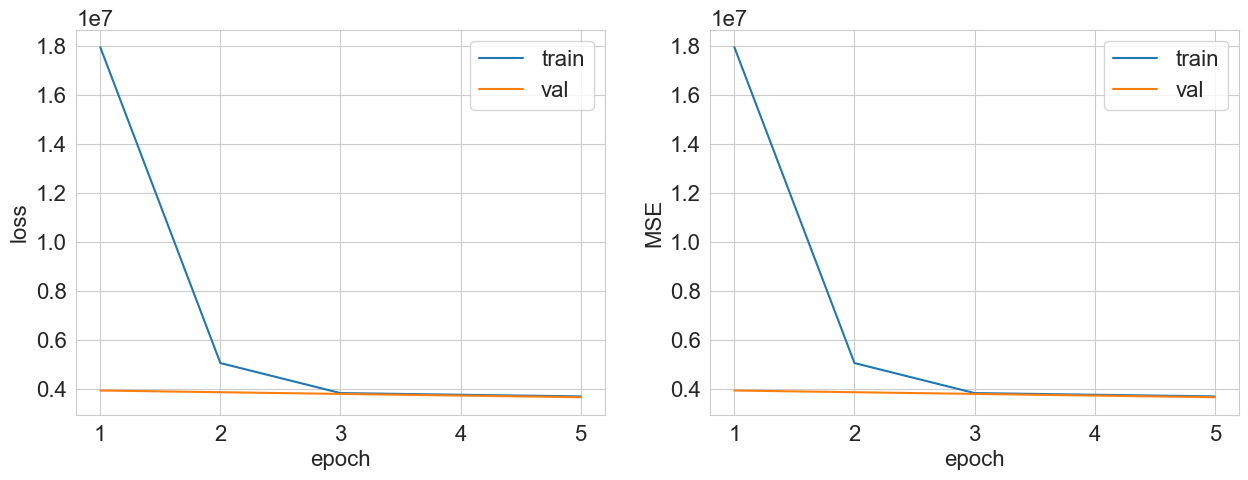

Validation MSE: 3653861.404


(3687143.8711298774, 3653861.4037691327)

In [436]:
train_and_validate(model_reg,
    optimizer_reg,
    criterion_mse,
    mse_metric,
    train_loader_reg,
    val_loader_reg,
    num_epochs)

**Задание 1.5 (0.5 балла).** Получилось ли у вас стабилизировать обучение? Помогли ли меньшие значения `lr`? Стало ли лучше от замены классификации на регрессию? Как вы думаете, почему так происходит? В качестве подсказки можете посмотреть на распределение целевой переменной и магнитуду значений признаков.

**Ответ:** Loss спустился в минимум, обучение стабилизировалось, но качество очень плохое. Возможно дело в отсутствии нормализации. Таргет распределен логнормально, что, конечно, сказывается на MSE в худшую сторону. К тому же признаки имеют разный масштаб, что плохо сказывается на градиентах

**Задание 1.6 (0.75 балла).** Начнем с того, что попробуем отнормировать целевую переменную. Для этого воспользуемся min-max нормализацией, чтобы целевая переменная принимала значения от 0 до 1. Реализуйте функции `normalize` и `denormalize`, которые, соответственно, нормируют целевую переменную и применяют обратное преобразование. Минимум и максимум оцените по обучающей выборке (то есть эти константы должны быть фиксированными и не зависеть от передаваемой выборки).

In [437]:
y_min = y_train_tensor.min() # минимум из обучающей выборки
y_max = y_train_tensor.max() # max

def normalize(sample):
    """
    Min-max normalization to convert sample to [0, 1] range
    """
    return (sample - y_min) / (y_max - y_min)


def denormalize(sample):
    """
    Denormalize sample from [0, 1] to initial range
    """
    return sample * (y_max - y_min) + y_min

Теперь повторите эксперимент из **задания 1.4**, обучаясь на нормированной целевой переменной. Сделаем также еще одно изменение: добавим [сигмоидную активацию](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html) после последнего линейного слоя сети. Таким образом мы гарантируем, что нейронная сеть предсказывает числа из промежутка $[0, 1]$. Использование активации - довольно распространенный прием, когда мы хотим получить числа из определенного диапазона значений. 

Данные

In [ ]:
# Тензоры без LabelEncoder
X_train_tensor = torch.FloatTensor(X_train).to(device)
y_train_tensor = torch.LongTensor(y_train).to(device)
X_val_tensor = torch.FloatTensor(X_val).to(device)
y_val_tensor = torch.LongTensor(y_val).to(device)

# нормализуем y_train и y_val
y_train_normalized = normalize(y_train_tensor).float()
y_val_normalized = normalize(y_val_tensor).float()

In [439]:
# DataLoader с нормализованным таргетом
train_dataset_reg_norm = TensorDataset(X_train_tensor.float(), y_train_normalized.reshape(-1, 1))
val_dataset_reg_norm = TensorDataset(X_val_tensor.float(), y_val_normalized.float().reshape(-1, 1))

train_loader_reg_norm = DataLoader(train_dataset_reg_norm, batch_size=64, shuffle=True)
val_loader_reg_norm = DataLoader(val_dataset_reg_norm, batch_size=64)

Параметры

In [440]:
input_size = 90
hidden_size = 128
learning_rate_mse = 1e-6
num_epochs = 7

Архитектура

In [441]:
class NeuralNet_reg_sig(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()  

    def forward(self, x):
        x = x.float()
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out
    
model_reg_sig = NeuralNet_reg_sig(input_size, hidden_size).to(device)

criterion_mse = torch.nn.MSELoss()

optimizer_reg_sig = torch.optim.SGD(model_reg_sig.parameters(), lr=learning_rate_mse)

Метрика

In [442]:
def mse_metric_with_norm(y_pred, y_test):
    y_pred_denorm = denormalize(y_pred) # денормализация предикта
    y_test_denorm = denormalize(y_test)
    return torch.mean((y_pred_denorm - y_test_denorm) ** 2).float().item()

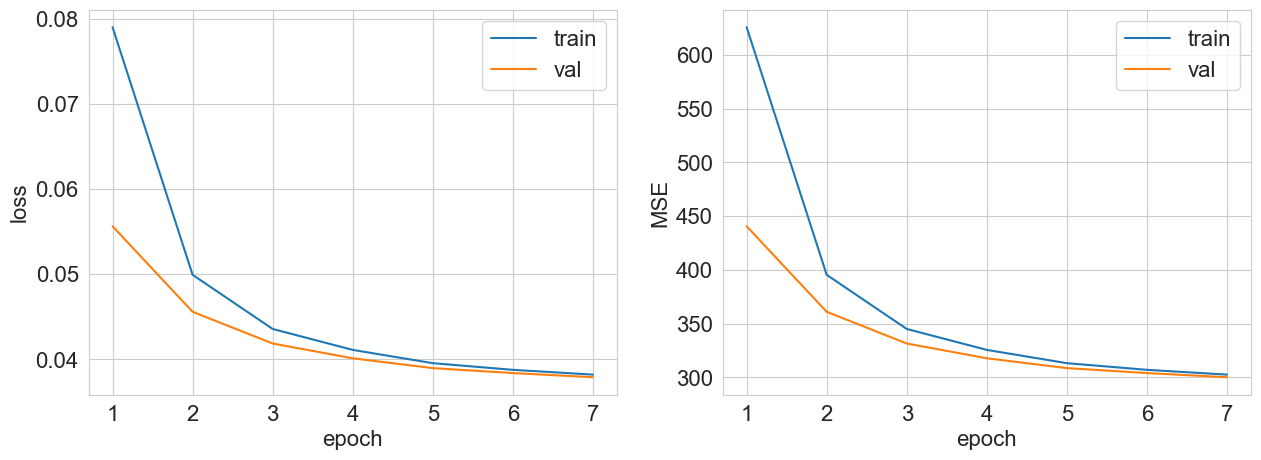

Validation MSE: 300.239


(302.6551539169251, 300.23857128905996)

In [443]:
train_and_validate(model_reg_sig,
    optimizer_reg_sig,
    criterion_mse,
    mse_metric_with_norm,
    train_loader_reg_norm,
    val_loader_reg_norm,
    num_epochs)

**Задание 1.7 (0.5 балла).** Сравните результаты этого эксперимента с предыдущим запуском. 

**Ответ:** Качество стало катастрофически лучше! Нормализация таргета очень значимо повлияла на качество.

**Задание 1.8 (0.75 балла).** На этот раз попробуем отнормировать не только целевую переменную, но и сами данные, которые подаются сети на вход. Для них будем использовать нормализацию через среднее и стандартное отклонение. Преобразуйте данные и повторите прошлый эксперимент. Скорее всего, имеет смысл увеличить число эпох обучения.

Данные

In [444]:
# преобразование тензоров Х_train на нормализованные
means_train = X_train_tensor.mean(dim=0, keepdim=True)
stds_train = X_train_tensor.std(dim=0, keepdim=True)
normalized_data_train = (X_train_tensor - means_train) / stds_train

In [445]:
# преобразование тензоров Х_val на нормализованные
means_val = X_val_tensor.mean(dim=0, keepdim=True)
stds_val = X_val_tensor.std(dim=0, keepdim=True)
normalized_data_val = (X_val_tensor - means_val) / stds_val

In [446]:
# Датасет и Dataloader
train_dataset_norm = TensorDataset(normalized_data_train, y_train_normalized.float().reshape(-1, 1))
val_dataset_norm = TensorDataset(normalized_data_val, y_val_normalized.float().reshape(-1, 1))

batch_size = 64
train_loader_norm = DataLoader(train_dataset_norm, batch_size=batch_size, shuffle=True)
val_loader_norm = DataLoader(val_dataset_norm, batch_size=batch_size)

Параметры

In [457]:
input_size = 90
hidden_size = 128
learning_rate_mse = 1e-2
num_epochs = 7

Архитектура

In [459]:
class NeuralNet_reg_sig(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()  

    def forward(self, x):
        x = x.float()
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out
    
model_reg_sig_norm = NeuralNet_reg_sig(input_size, hidden_size).to(device)

criterion_mse = torch.nn.MSELoss()

optimizer_reg_sig_norm = torch.optim.SGD(model_reg_sig_norm.parameters(), lr=learning_rate_mse)

Метрика

In [460]:
def mse_metric_with_norm(y_pred, y_test):
    y_pred_denorm = denormalize(y_pred) # денормализация предикта
    y_test_denorm = denormalize(y_test)
    return torch.mean((y_pred_denorm - y_test_denorm) ** 2).float().item()

Обучение

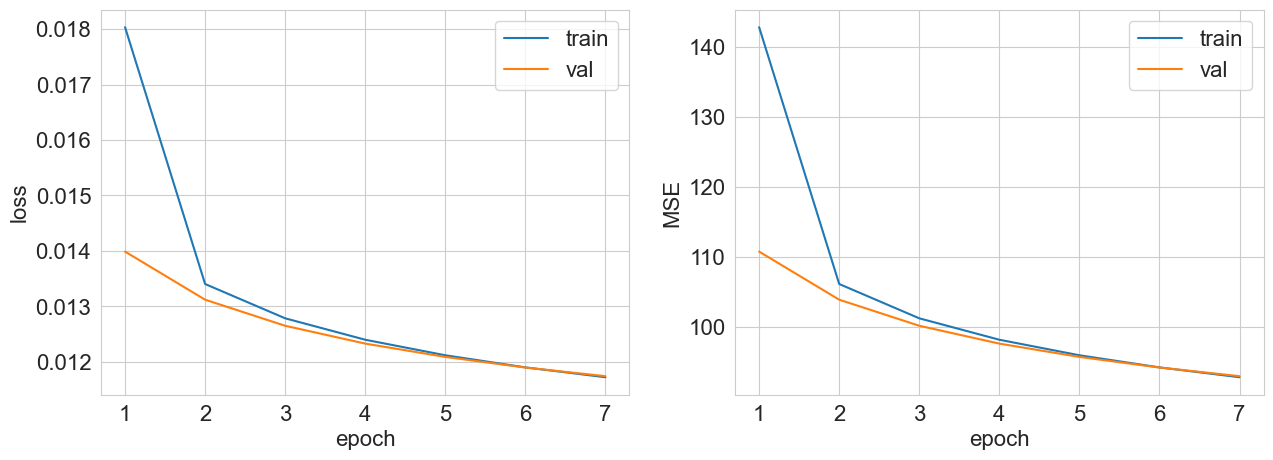

Validation MSE: 92.995


(92.84533590251587, 92.99518544561874)

In [461]:
train_and_validate(model_reg_sig_norm,
    optimizer_reg_sig_norm,
    criterion_mse,
    mse_metric_with_norm,
    train_loader_norm,
    val_loader_norm,
    num_epochs)

Если вы все сделали правильно, то у вас должно было получиться качество, сравнимое с `Ridge` регрессией.

**Мораль:** как видите, нам пришлось сделать очень много хитрых телодвижений, чтобы нейронная сеть работала хотя бы так же, как и простая линейная модель. Здесь, конечно, показан совсем экстремальный случай, когда без нормализации данных нейронная сеть просто не учится. Как правило, в реальности завести нейронную сеть из коробки не очень сложно, но вот заставить ее работать на полную &mdash; куда более трудоемкая задача. Написание пайплайнов обучения нейросетевых моделей требует большой аккуратности, а дебаг часто превращается в угадайку. К счастью, очень часто на помощь приходит интуиция, и мы надеемся, что вы сможете выработать ее в течение нашего курса. Начнем с двух советов, которые стоит принять на вооружение:

- Обязательно начинаем любые эксперименты с бейзлайнов: без них мы бы не поняли, что нейронная сеть не учится в принципе.
- При постановке эксперментов старайтесь делать минимальное количество изменений за раз (в идеале одно!): только так можно понять, какие конкретно изменения влияют на результат.

## Часть 2. Улучшаем нейронную сеть (5 баллов)

Продолжим экспериментировать с нейронной сетью, чтобы добиться еще лучшего качества.

**Задание 2.1 (1 балл).** Давайте попробуем другие оптимизаторы. Обучите нейросеть с помощью SGD+momentum и Adam. Опишите свои наблюдения и в дальнейших запусках используйте лучший оптимизатор. Для Adam обычно берут learning rate поменьше, в районе $10^{-3}$.

**SGD + Momentum**

Данные полностью нормализованные

Архитектура

In [502]:
class NeuralNet_reg_sig(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()  

    def forward(self, x):
        x = x.float()
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out
    
model_reg_sig_norm = NeuralNet_reg_sig(input_size, hidden_size).to(device)

criterion_mse = torch.nn.MSELoss()

optimizer_sgd_momentum = torch.optim.SGD(model_reg_sig_norm.parameters(), lr=learning_rate_mse, momentum=0.5)

Обучение

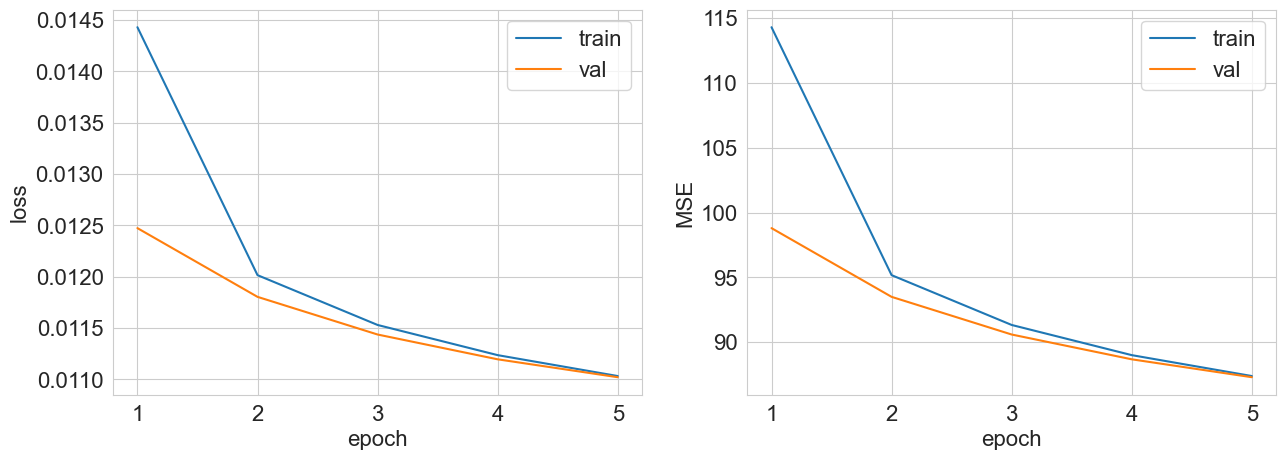

Validation MSE: 87.299


(87.38956702302426, 87.29909697740341)

In [503]:
train_and_validate(model_reg_sig_norm,
    optimizer_sgd_momentum,
    criterion_mse,
    mse_metric_with_norm,
    train_loader_norm,
    val_loader_norm,
    num_epochs)

**Adam**

Параметры

In [464]:
input_size = 90
hidden_size = 128
learning_rate_adam = 10e-2
num_epochs = 7

Архитектура

In [465]:
class NeuralNet_reg_sig(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()  

    def forward(self, x):
        x = x.float()
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out
    
model_reg_sig_norm = NeuralNet_reg_sig(input_size, hidden_size).to(device)

criterion_mse = torch.nn.MSELoss()

optimizer_adam = torch.optim.Adam(model_reg_sig_norm.parameters(), lr=learning_rate_adam)

Обучение

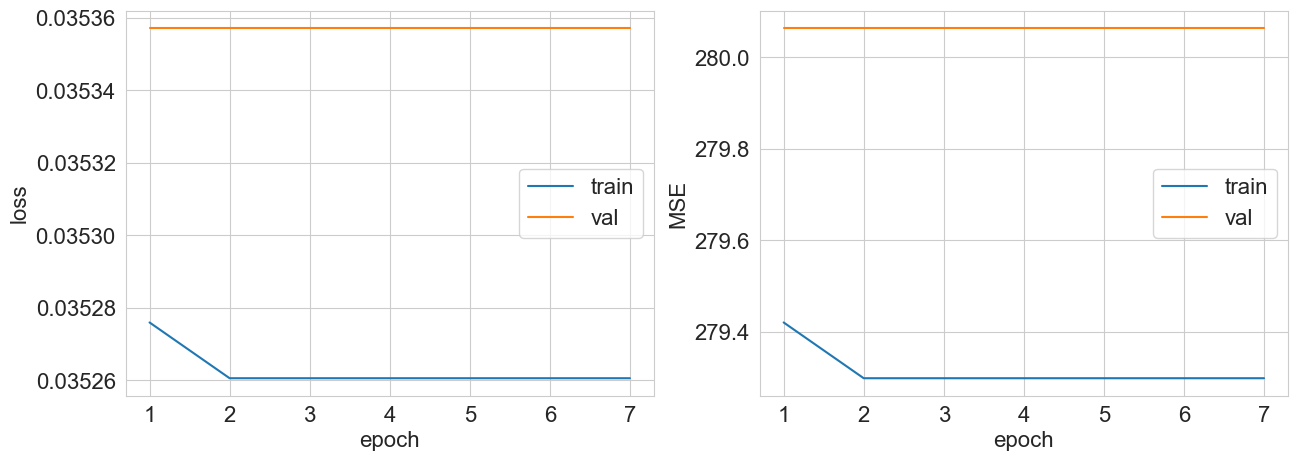

Validation MSE: 280.064


(279.29899169504347, 280.0635743874341)

In [466]:
train_and_validate(model_reg_sig_norm,
    optimizer_adam,
    criterion_mse,
    mse_metric_with_norm,
    train_loader_norm,
    val_loader_norm,
    num_epochs)

SGD + Momentum показали качество лучше, чем Adam - используем SGD

**Задание 2.2 (1 балл).** Теперь сделаем нашу нейронную сеть более сложной. Попробуйте сделать сеть:

- более широкой (то есть увеличить размерность скрытого слоя, например, вдвое)
- более глубокой (то есть добавить еще один скрытый слой)

Опишите, как увеличение числа параметров модели влияет на качество на обучающей и валидационной выборках.

Параметры

In [504]:
input_size = 90
hidden_size = 128
hidden_size_x2 = 256
learning_rate_adam = 10e-3
num_epochs = 5

Архитектура

In [505]:
class NeuralNet_reg_sig_ext(nn.Module):
    def __init__(self, input_size, hidden_size_x2, hidden_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_x2)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size_x2, hidden_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()  

    def forward(self, x):
        x = x.float()
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.sigmoid(out)
        return out
    
model_reg_sig_norm_ext = NeuralNet_reg_sig_ext(input_size, hidden_size_x2, hidden_size).to(device)

criterion_mse = torch.nn.MSELoss()

optimizer_sgd_momentum = torch.optim.SGD(model_reg_sig_norm_ext.parameters(), lr=learning_rate_mse, momentum=0.5)

Обучение

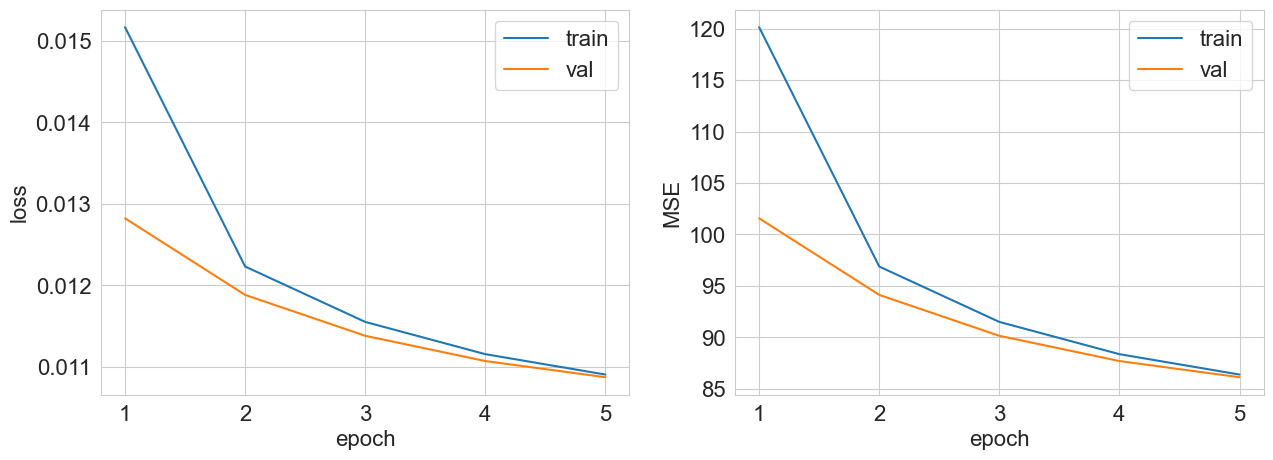

Validation MSE: 86.123


(86.38260373392453, 86.12313553557269)

In [506]:
train_and_validate(model_reg_sig_norm_ext,
    optimizer_sgd_momentum,
    criterion_mse,
    mse_metric_with_norm,
    train_loader_norm,
    val_loader_norm,
    num_epochs)

Качество немного улучшилось! На удивление, переобучения не наблюдаю, разве что в десятых значениях

**Задание 2.3 (1 балл).** Как вы должны были заметить, более сложная модель стала сильнее переобучаться. Попробуем добавить в обучение регуляризацию, чтобы бороться с переобучением. Добавьте слой дропаута ([`nn.Dropout`](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html#torch.nn.Dropout)) с параметром $p=0.2$ после каждого линейного слоя, кроме последнего. Почитать про дропаут можете в следующем [блогпосте](https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5) или в оригинальной [статье](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)

Опишите результаты. 

Архитектура

In [507]:
class NeuralNet_reg_sig_ext_drop(nn.Module):
    def __init__(self, input_size, hidden_size_x2, hidden_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_x2)
        self.relu = nn.ReLU()
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(hidden_size_x2, hidden_size)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()  

    def forward(self, x):
        x = x.float()
        out = self.fc1(x)
        out = self.relu(out)
        out = self.dropout1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.dropout2(out)
        out = self.fc3(out)
        out = self.sigmoid(out)
        return out
    
model_reg_sig_norm_ext_drop = NeuralNet_reg_sig_ext_drop(input_size, hidden_size_x2, hidden_size).to(device)

criterion_mse = torch.nn.MSELoss()

optimizer_sgd_momentum = torch.optim.SGD(model_reg_sig_norm_ext_drop.parameters(), lr=learning_rate_mse, momentum=0.5)

Обучение

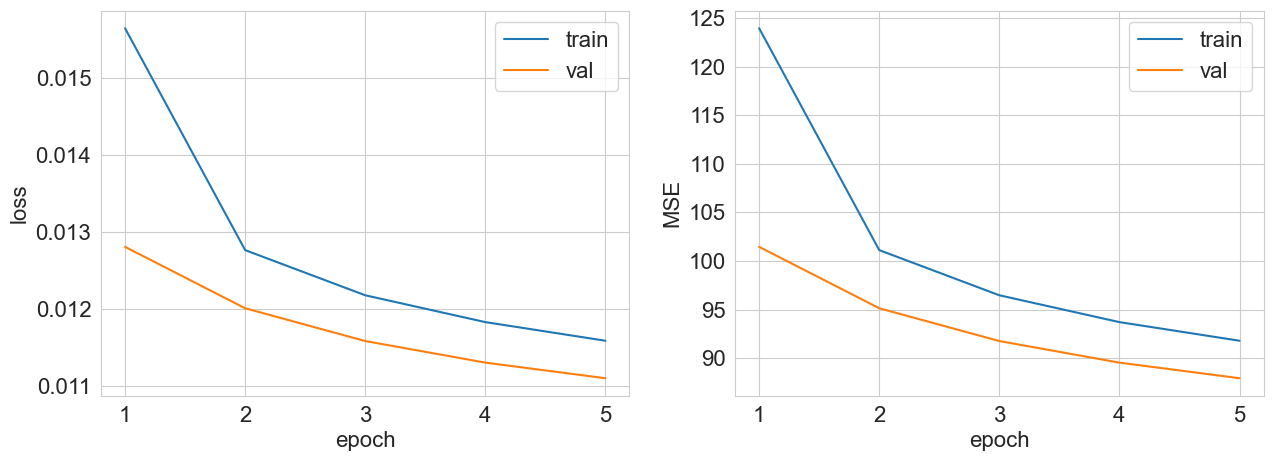

Validation MSE: 87.937


(91.79317021332676, 87.9369977545427)

In [508]:
train_and_validate(model_reg_sig_norm_ext_drop,
    optimizer_sgd_momentum,
    criterion_mse,
    mse_metric_with_norm,
    train_loader_norm,
    val_loader_norm,
    num_epochs)

Переобучение увеличилось хах

**Задание 2.4 (1.5 балла).** Теперь, когда мы определились с выбором архитектуры нейронной сети, пора заняться рутиной DL-инженера &mdash; перебором гиперпараметров. Подберите оптимальное значение lr по значению MSE на валидации (по логарифмической сетке, достаточно посмотреть 3-4 значения), можете воспользоваться `verbose=False` в функции `train_and_validate`.

Также подберем оптимальное значение параметра weight decay для данного lr. Weight decay &mdash; это аналог L2-регуляризации для нейронных сетей. Почитать о нем можно, например, [здесь](https://paperswithcode.com/method/weight-decay). В PyTorch он задается как параметр оптимизатора `weight_decay`. Подберите оптимальное значение weight decay по логарифимической сетке (его типичные значения лежат в диапазоне $[10^{-6}, 10^{-3}]$, но не забудьте включить нулевое значение в сетку).

Постройте графики зависимости MSE на трейне и на валидации от значений параметров. Прокомментируйте получившиеся зависимости.

In [546]:
input_size = 90
hidden_size = 128
hidden_size_x2 = 256
num_epochs = 5

In [547]:
# значения для перебора
learning_rates = [1e-1, 1e-2, 1e-3, 1e-4]
weight_decays = [0, 1e-3, 1e-4, 1e-5, 1e-6]

# история mse
train_mse_hist = []
val_mse_hist = []

for lr in learning_rates:
    for wd in weight_decays:
        # модель и оптимизатор
        model = NeuralNet_reg_sig_ext_drop(input_size, hidden_size_x2, hidden_size).to(device)
        optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.5, weight_decay=wd)
        
        train_mse, val_mse = train_and_validate(
            model, optimizer, criterion_mse, mse_metric_with_norm, 
            train_loader_norm, val_loader_norm, 
            num_epochs, verbose=False
        )
        
        train_mse_hist.append(train_mse)
        val_mse_hist.append(val_mse)

In [548]:
# ось X
X_ax = ['lr=1e-1, wd=0', 'lr=1e-1, wd=1e-3', 'lr=1e-1, wd=1e-4', 'lr=1e-1, wd=1e-5', 'lr=1e-1, wd=1e-6',
        'lr=1e-2, wd=0', 'lr=1e-2, wd=1e-3', 'lr=1e-2, wd=1e-4', 'lr=1e-2, wd=1e-5', 'lr=1e-2, wd=1e-6',
        'lr=1e-3, wd=0', 'lr=1e-3, wd=1e-3', 'lr=1e-3, wd=1e-4', 'lr=1e-3, wd=1e-5', 'lr=1e-3, wd=1e-6',
        'lr=1e-4, wd=0', 'lr=1e-4, wd=1e-3', 'lr=1e-4, wd=1e-4', 'lr=1e-4, wd=1e-5', 'lr=1e-4, wd=1e-6',
        ]

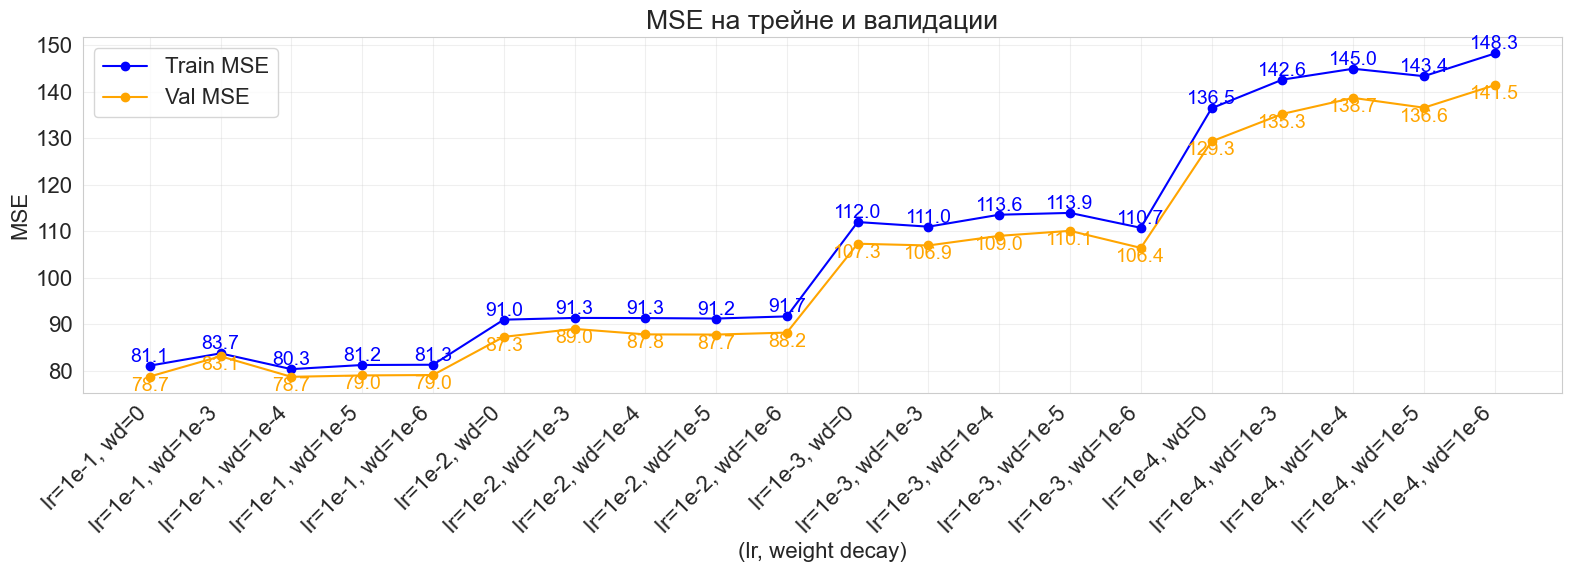

In [549]:
plt.figure(figsize=(16, 6))
plt.plot(X_ax, train_mse_hist, 'o-', label='Train MSE', color='blue')
plt.plot(X_ax, val_mse_hist, 'o-', label='Val MSE', color='orange')

# подписи значений
for i, (train_mse, val_mse) in enumerate(zip(train_mse_hist, val_mse_hist)):
    plt.text(i, train_mse, f'{train_mse:.1f}', 
             ha='center', va='bottom', color='blue', fontsize=14)
    plt.text(i, val_mse, f'{val_mse:.1f}', 
             ha='center', va='top', color='orange', fontsize=14)

plt.xlabel('(lr, weight decay)')
plt.ylabel('MSE')
plt.title('MSE на трейне и валидации')
plt.legend()
plt.xticks(rotation=45, ha='right')  # поворот
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Заметно, что лучшие параметры (при отсутсвии переобучения) lr = 1e-1 ; wd = 1e-3 \
Чем меньше learning_rate, тем хуже MSE, потому что мало кол-ва эпох, чтобы дойти до минимума. При очень малых значениях learning_rate значения weight_decay относительно сильно влияют на MSE, а при больших значениях learning_rate, меньше влияет, но в  случае lr=1e-1 при wd=1e-3 переобучение сильно снизилось. Делаем вывод, что weight_decay не делает хуже, а чаще лучше

Запрос в DeepSeek: код для тепловой карты \
Ответ: \
Python с использованием Matplotlib и Seaborn
python
Copy
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Создаем случайные данные
data = np.random.rand(10, 12)

#Создаем тепловую карту
plt.figure(figsize=(10, 8))
sns.heatmap(data, annot=True, fmt=".2f", cmap="coolwarm", 
            linewidths=.5, cbar_kws={'label': 'Значения'})

plt.title("Тепловая карта")
plt.xlabel("Столбцы")
plt.ylabel("Строки")
plt.show()

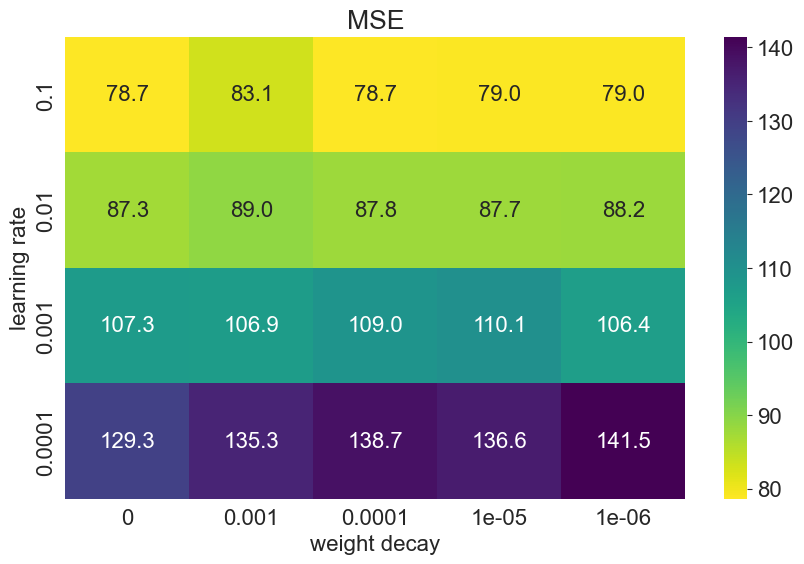

In [550]:
import seaborn as sns

val_mse_matrix = np.array(val_mse_hist).reshape(len(learning_rates), len(weight_decays))

plt.figure(figsize=(10, 6))
sns.heatmap(val_mse_matrix, 
            annot=True, 
            fmt=".1f",
            xticklabels=weight_decays,
            yticklabels=learning_rates,
            cmap="viridis_r")
plt.xlabel("weight decay")
plt.ylabel("learning rate")
plt.title("MSE")
plt.show()

Как вы могли заметить, еще одна рутина DL-инженера &mdash; утомительное ожидание обучения моделей.

**Задание 2.5 (0.5 балла).** Мы провели большое число экспериментов и подобрали оптимальную архитектуру и гиперпараметры. Пришло время обучить модель на полной обучающей выборке, померять качество на тестовой выборке и сравнить с бейзлайнами. Проделайте это. 

Данные

In [551]:
# разбивка на train и test
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = int(0.75 * X.shape[0])
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]
X_train.shape, X_test.shape

((386508, 90), (128837, 90))

In [552]:
# тензоры
X_train_tensor = torch.FloatTensor(X_train).to(device)
y_train_tensor = torch.LongTensor(y_train).to(device)
X_test_tensor = torch.FloatTensor(X_test).to(device)
y_test_tensor = torch.LongTensor(y_test).to(device)

# нормализуем y_train и y_test
y_train_normalized = normalize(y_train_tensor).float()
y_test_normalized = normalize(y_test_tensor).float()

In [553]:
# преобразование тензоров Х_train на нормализованные
means_train = X_train_tensor.mean(dim=0, keepdim=True)
stds_train = X_train_tensor.std(dim=0, keepdim=True)
normalized_data_train = (X_train_tensor - means_train) / stds_train

In [554]:
# преобразование тензоров Х_test на нормализованные
means_test = X_test_tensor.mean(dim=0, keepdim=True)
stds_test = X_test_tensor.std(dim=0, keepdim=True)
normalized_data_test = (X_test_tensor - means_test) / stds_test

In [555]:
# Датасет и Dataloader
train_dataset_norm = TensorDataset(normalized_data_train, y_train_normalized.float().reshape(-1, 1))
test_dataset_norm = TensorDataset(normalized_data_test, y_test_normalized.float().reshape(-1, 1))

batch_size = 64
train_loader_norm = DataLoader(train_dataset_norm, batch_size=batch_size, shuffle=True)
test_loader_norm = DataLoader(test_dataset_norm, batch_size=batch_size)

Параметры

In [ ]:
# лучшие параметры после подбора
input_size = 90
hidden_size = 128
hidden_size_x2 = 256
learning_rate_best = 1e-1
weight_decay = 1e-3
num_epochs = 5

Архитектура

In [557]:
class NeuralNet_reg_sig_ext_drop(nn.Module):
    def __init__(self, input_size, hidden_size_x2, hidden_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_x2)
        self.relu = nn.ReLU()
        self.dropout1 = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(hidden_size_x2, hidden_size)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()  

    def forward(self, x):
        x = x.float()
        out = self.fc1(x)
        out = self.relu(out)
        out = self.dropout1(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.dropout2(out)
        out = self.fc3(out)
        out = self.sigmoid(out)
        return out
    
model_reg_sig_norm_ext_drop = NeuralNet_reg_sig_ext_drop(input_size, hidden_size_x2, hidden_size).to(device)

criterion_mse = torch.nn.MSELoss()

optimizer_best = torch.optim.SGD(model_reg_sig_norm_ext_drop.parameters(), lr=learning_rate_best, momentum=0.5, weight_decay=weight_decay)

Обучение

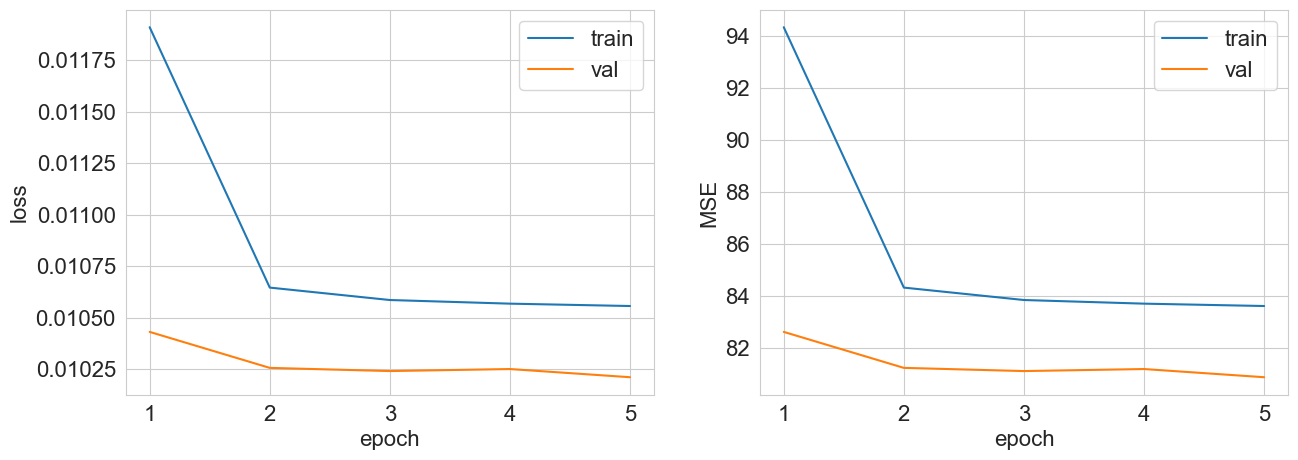

Validation MSE: 80.878


(83.61555409721872, 80.87840683766667)

In [558]:
train_and_validate(
            model_reg_sig_norm_ext_drop, 
            optimizer_best, 
            criterion_mse, 
            mse_metric_with_norm, 
            train_loader_norm, 
            test_loader_norm, 
            num_epochs, verbose=True)